In [3]:
import numpy as np
import pandas as pd


# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [4]:
df = pd.read_csv("../data/adult.csv")
df_new = df[~df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]


# Task 1
Print the count of men and women in the dataset.

In [21]:
men_count = df_new[df_new['sex'] == 'Male'].shape[0]
women_count = df_new[df_new['sex'] == 'Female'].shape[0]
print("Men count:", men_count)
print("Women count:", women_count)

Men count: 20380
Women count: 9782


# Task 2
Find the average age of men in dataset

In [25]:
avg_men_age = df_new[df_new['sex'] == 'Male']['age'].mean()
avg_men_age

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [41]:
poland_people = df_new[df_new['native-country'] == 'Poland'].shape[0]
total_count = df_new.shape[0]
poland_percentage = (poland_people / total_count) * 100
poland_percentage

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [40]:
high_income_mean = df_new[df_new['salary'] > '>50']['age'].mean()
high_income_std = df_new[df_new['salary'] == '>50K']['age'].std()
low_income_mean = df_new[df_new['salary'] == '<=50K']['age'].mean()
low_income_std = df_new[df_new['salary'] == '<=50K']['age'].std()


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [45]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
without_higher_education = df_new[
        ~df_new['education'].isin(higher_education)
        & (df_new['salary'] == '>50K')
    ]
without_higher_education

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


|# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [48]:
education_statistics = df_new.groupby('education')['age'].describe()
education_statistics

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [54]:
married_men_above_50k = ((df_new['sex'] == 'Male') & (df_new['marital-status'].str.startswith('Married')) & (df_new['salary'] == '>50K')).sum()
married_men_below_or_equal_50k = ((df_new['sex'] == 'Male') & (df_new['marital-status'].str.startswith('Married')) & (df_new['salary'] == '<=50K')).sum()
non_married_men_above_50k = ((df_new['sex'] == 'Male') & (~df_new['marital-status'].str.startswith('Married')) & (df_new['salary'] == '>50K')).sum()
non_married_men_below_or_equal_50k = ((df_new['sex'] == 'Male') & (~df_new['marital-status'].str.startswith('Married')) & (df_new['salary'] == '<=50K')).sum()

7052

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [59]:
max_hours = df_new['hours-per-week'].max()
count_people_with_same_hours = df_new[df_new['hours-per-week'] == max_hours].shape[0]
count_people_with_same_hours

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

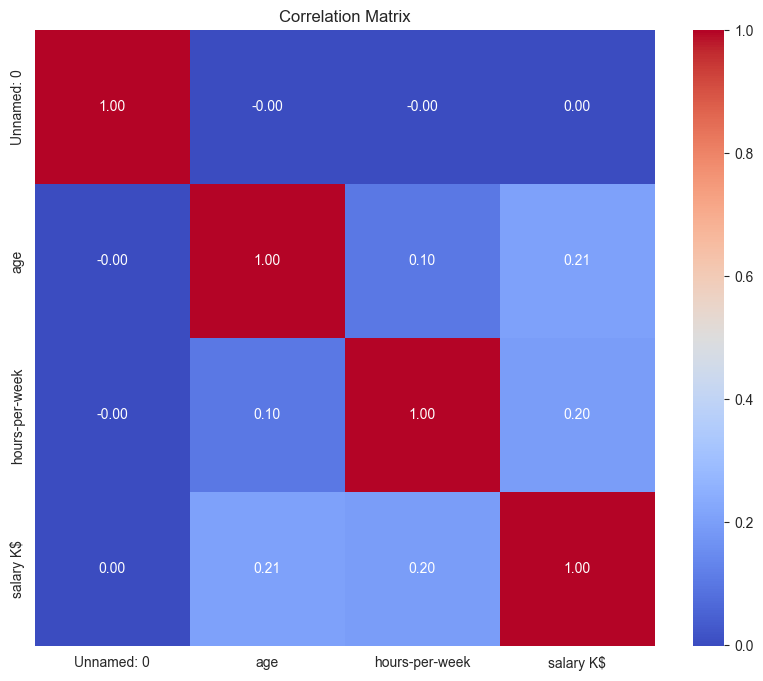

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = df_new.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()